# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**Feb 26, 11:59pm: See the [Calendar](https://github.com/UBC-CS/cpsc330-2023W2/tree/main?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W2/blob/main/docs/homework_instructions.md).

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Type your answer here, replacing this text._

This is a binary classification problem. The task is to predict whether a credit card client will default or not. The dataset is of moderate size. The number of features is rather small. I would consider this as a small dimensional problem. All features are numerically encoded. That said, some features such as sex and marriage seem more like categorical features.

In [2]:
# BEGIN SOLUTION
df = pd.read_csv("data/UCI_Credit_Card.csv")
# END SOLUTION

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [4]:
# BEGIN SOLUTION
train_df, test_df = train_test_split(df, test_size=0.3, random_state=76)
train_df.shape
# END SOLUTION

(21000, 25)

<!-- END QUESTION -->

<br><br>

In [5]:
train_df['EDUCATION'].value_counts()

EDUCATION
2    9789
1    7522
3    3365
5     197
4      80
6      37
0      10
Name: count, dtype: int64

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Type your answer here, replacing this text._

In [6]:
# BEGIN SOLUTION
print("n=%d, d=%d" % train_df.shape)
train_df.describe()
# END SOLUTION

n=21000, d=25


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
# BEGIN SOLUTION
train_df.info()
# END SOLUTION

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 8958 to 2721
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   21000 

Seems like there are no missing values and all the columns are encoded as numeric columns. 

In [8]:
# BEGIN SOLUTION
print(
    "Fraction that default:\n",
    train_df["default.payment.next.month"].value_counts(normalize=True),
)
# END SOLUTION

Fraction that default:
 default.payment.next.month
0    0.778143
1    0.221857
Name: proportion, dtype: float64


We have a class imbalance. Both classes seem importance here and I am going to pick macro-average f1 score as our evaluation metric. 

In [9]:
# BEGIN SOLUTION
from sklearn.metrics import f1_score, make_scorer, recall_score

custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer
# END SOLUTION

In [10]:
# BEGIN SOLUTION
np.max(train_df, axis=0)
# END SOLUTION

ID                              29999.0
LIMIT_BAL                      800000.0
SEX                                 2.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                79.0
PAY_0                               8.0
PAY_2                               8.0
PAY_3                               8.0
PAY_4                               8.0
PAY_5                               8.0
PAY_6                               8.0
BILL_AMT1                      746814.0
BILL_AMT2                      743970.0
BILL_AMT3                     1664089.0
BILL_AMT4                      706864.0
BILL_AMT5                      823540.0
BILL_AMT6                      568638.0
PAY_AMT1                       873552.0
PAY_AMT2                      1684259.0
PAY_AMT3                       889043.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


In [11]:
# BEGIN SOLUTION
np.min(train_df, axis=0)
# END SOLUTION

ID                                 1.0
LIMIT_BAL                      10000.0
SEX                                1.0
EDUCATION                          0.0
MARRIAGE                           0.0
AGE                               21.0
PAY_0                             -2.0
PAY_2                             -2.0
PAY_3                             -2.0
PAY_4                             -2.0
PAY_5                             -2.0
PAY_6                             -2.0
BILL_AMT1                    -165580.0
BILL_AMT2                     -69777.0
BILL_AMT3                    -157264.0
BILL_AMT4                    -170000.0
BILL_AMT5                     -81334.0
BILL_AMT6                    -209051.0
PAY_AMT1                           0.0
PAY_AMT2                           0.0
PAY_AMT3                           0.0
PAY_AMT4                           0.0
PAY_AMT5                           0.0
PAY_AMT6                           0.0
default.payment.next.month         0.0
dtype: float64

In [12]:
# BEGIN SOLUTION
X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)
X_test, y_test = (
    test_df.drop(columns=["default.payment.next.month"]),
    test_df["default.payment.next.month"],
)
# END SOLUTION

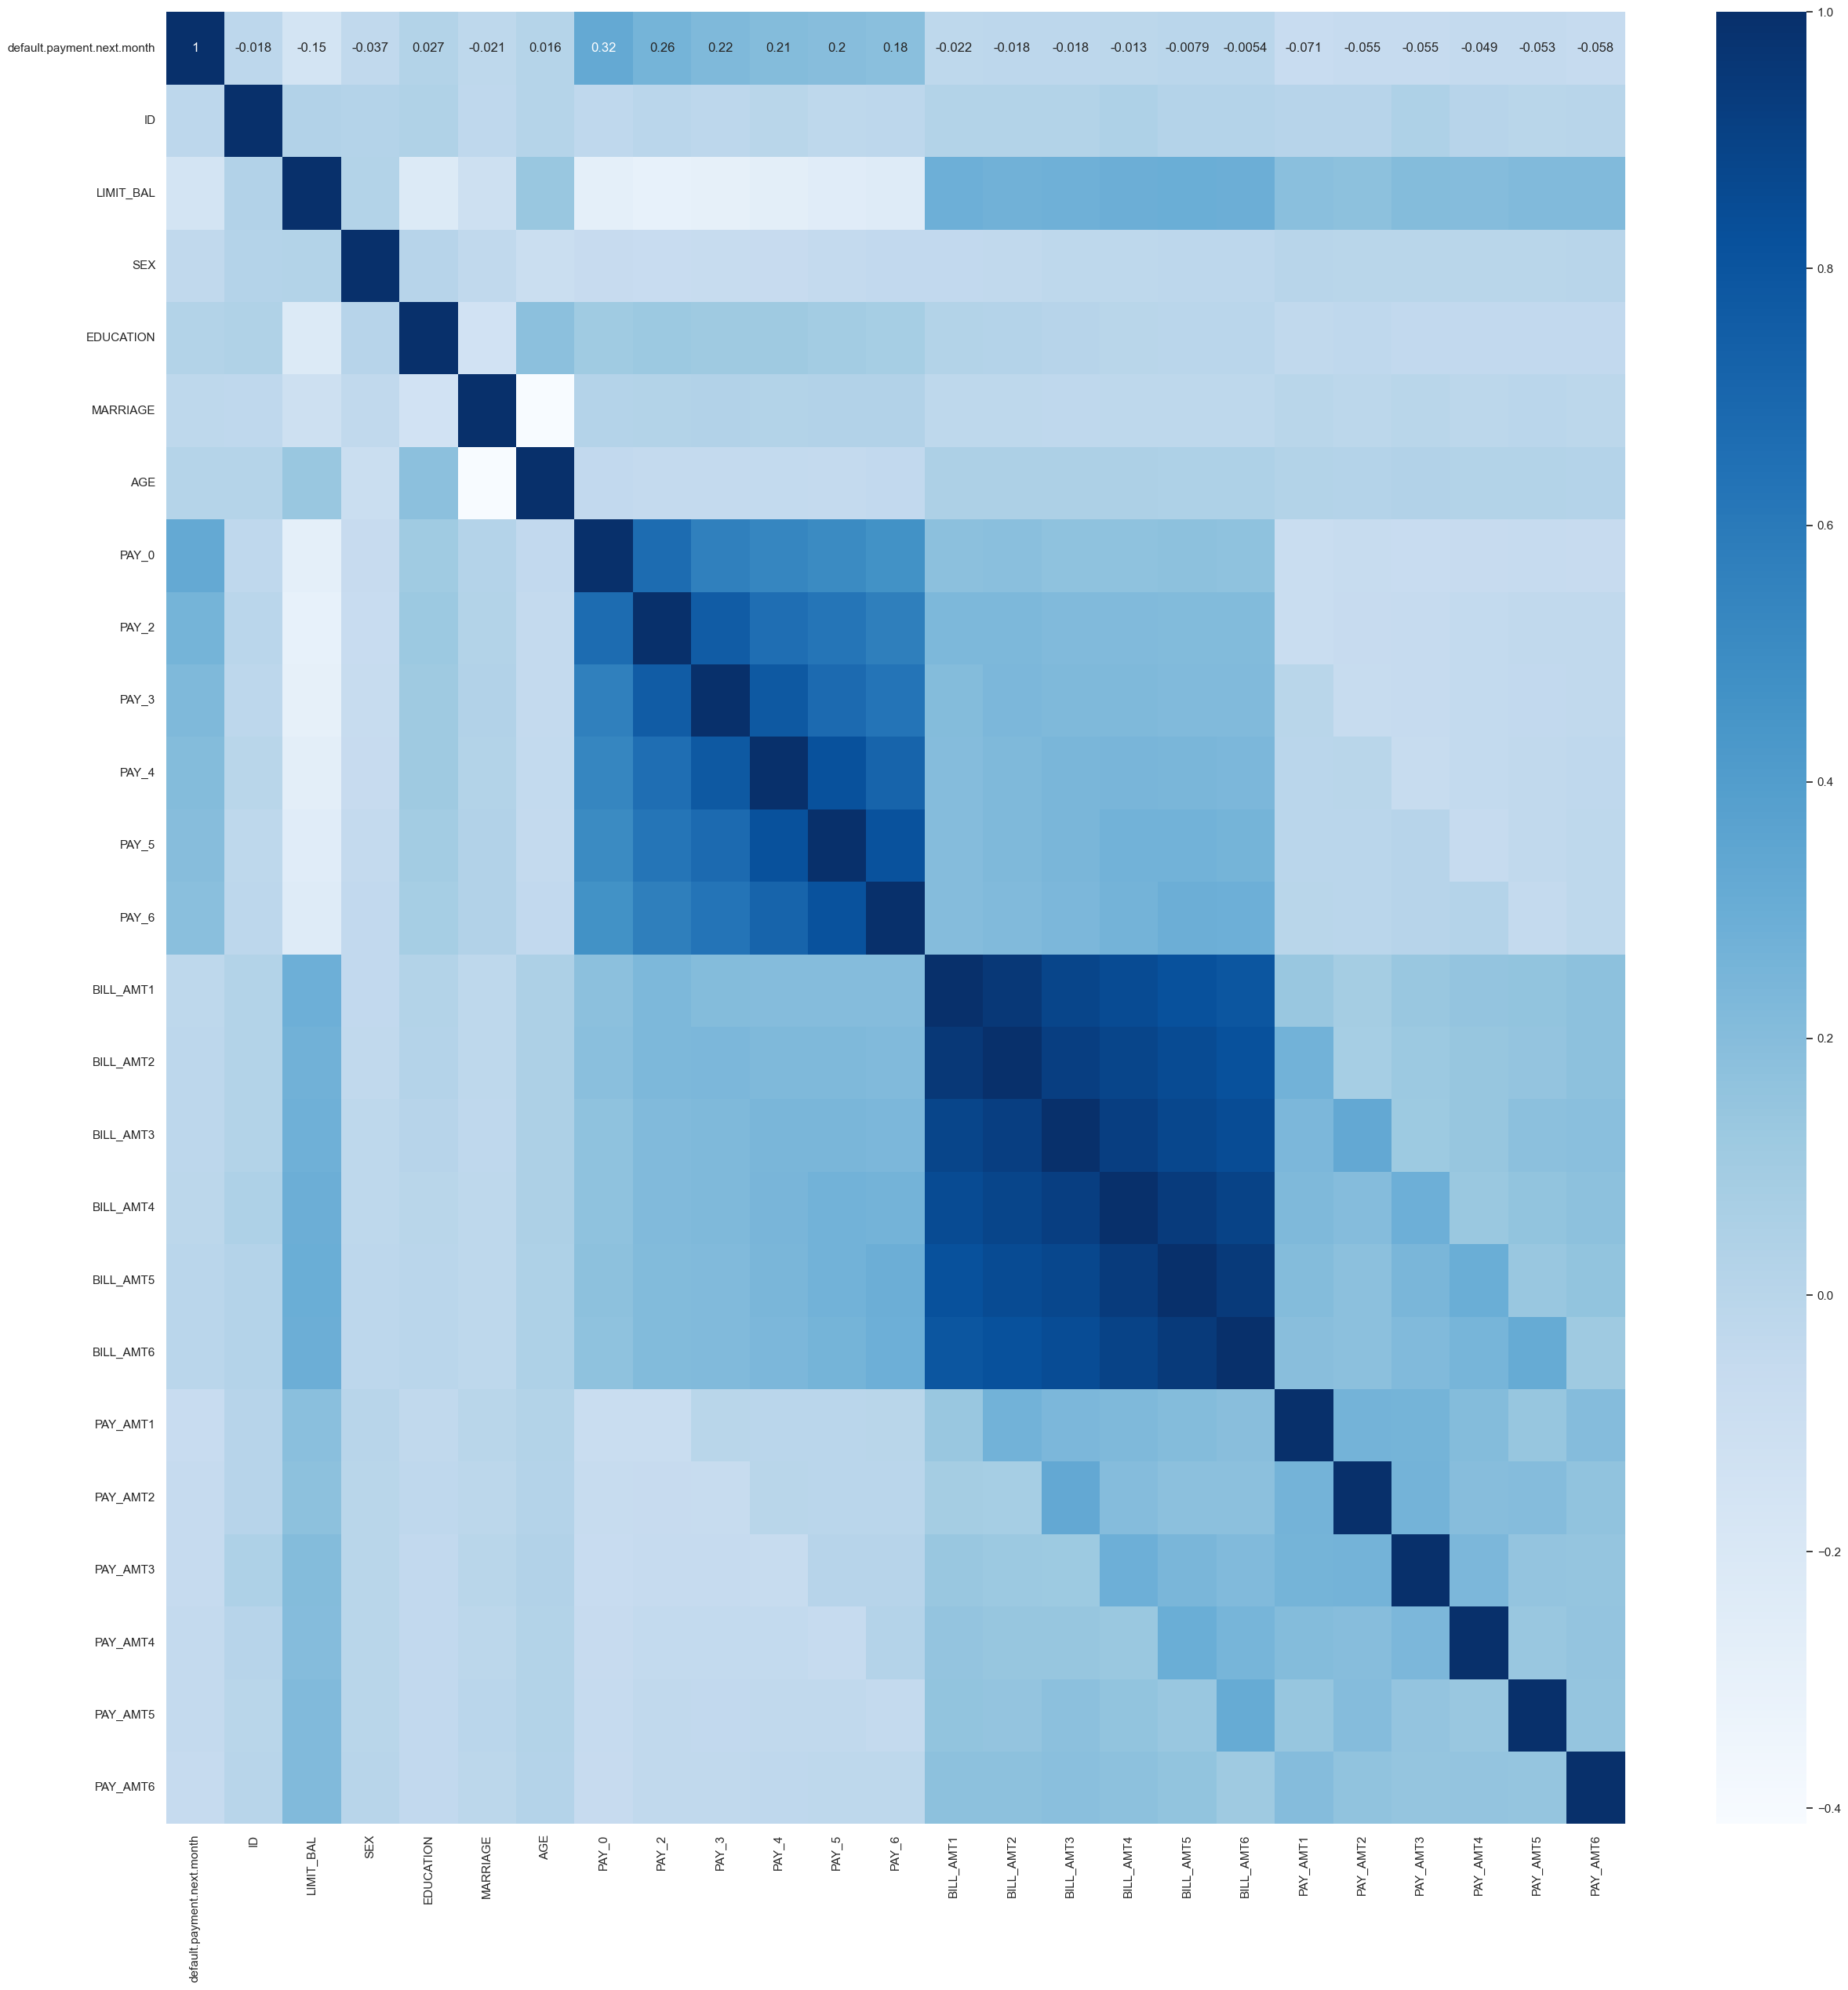

In [13]:
# BEGIN SOLUTION
import seaborn as sns
cor = pd.concat((y_train, X_train), axis=1).iloc[:, :30].corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);
# END SOLUTION

Seems like all `PAY_\d*` features and `BILL_AMT\d*` features are highly correlated. 

/Users/mathias/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mathias/miniconda3/envs/cpsc330/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


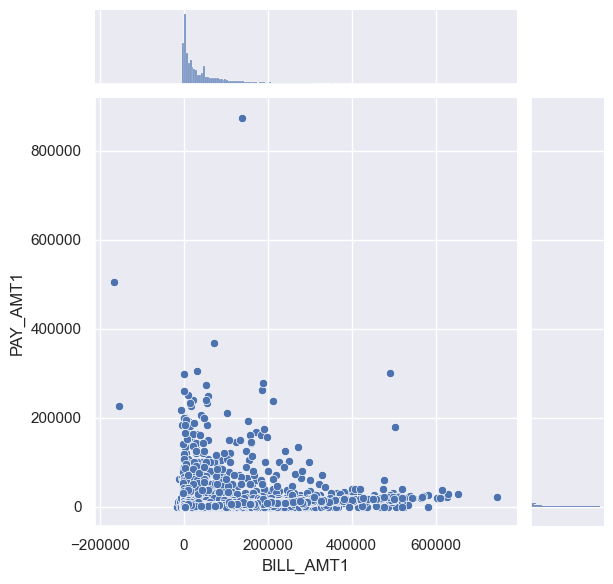

In [14]:
# BEGIN SOLUTION
sns.jointplot(x="BILL_AMT1", y="PAY_AMT1", data=train_df);
# END SOLUTION

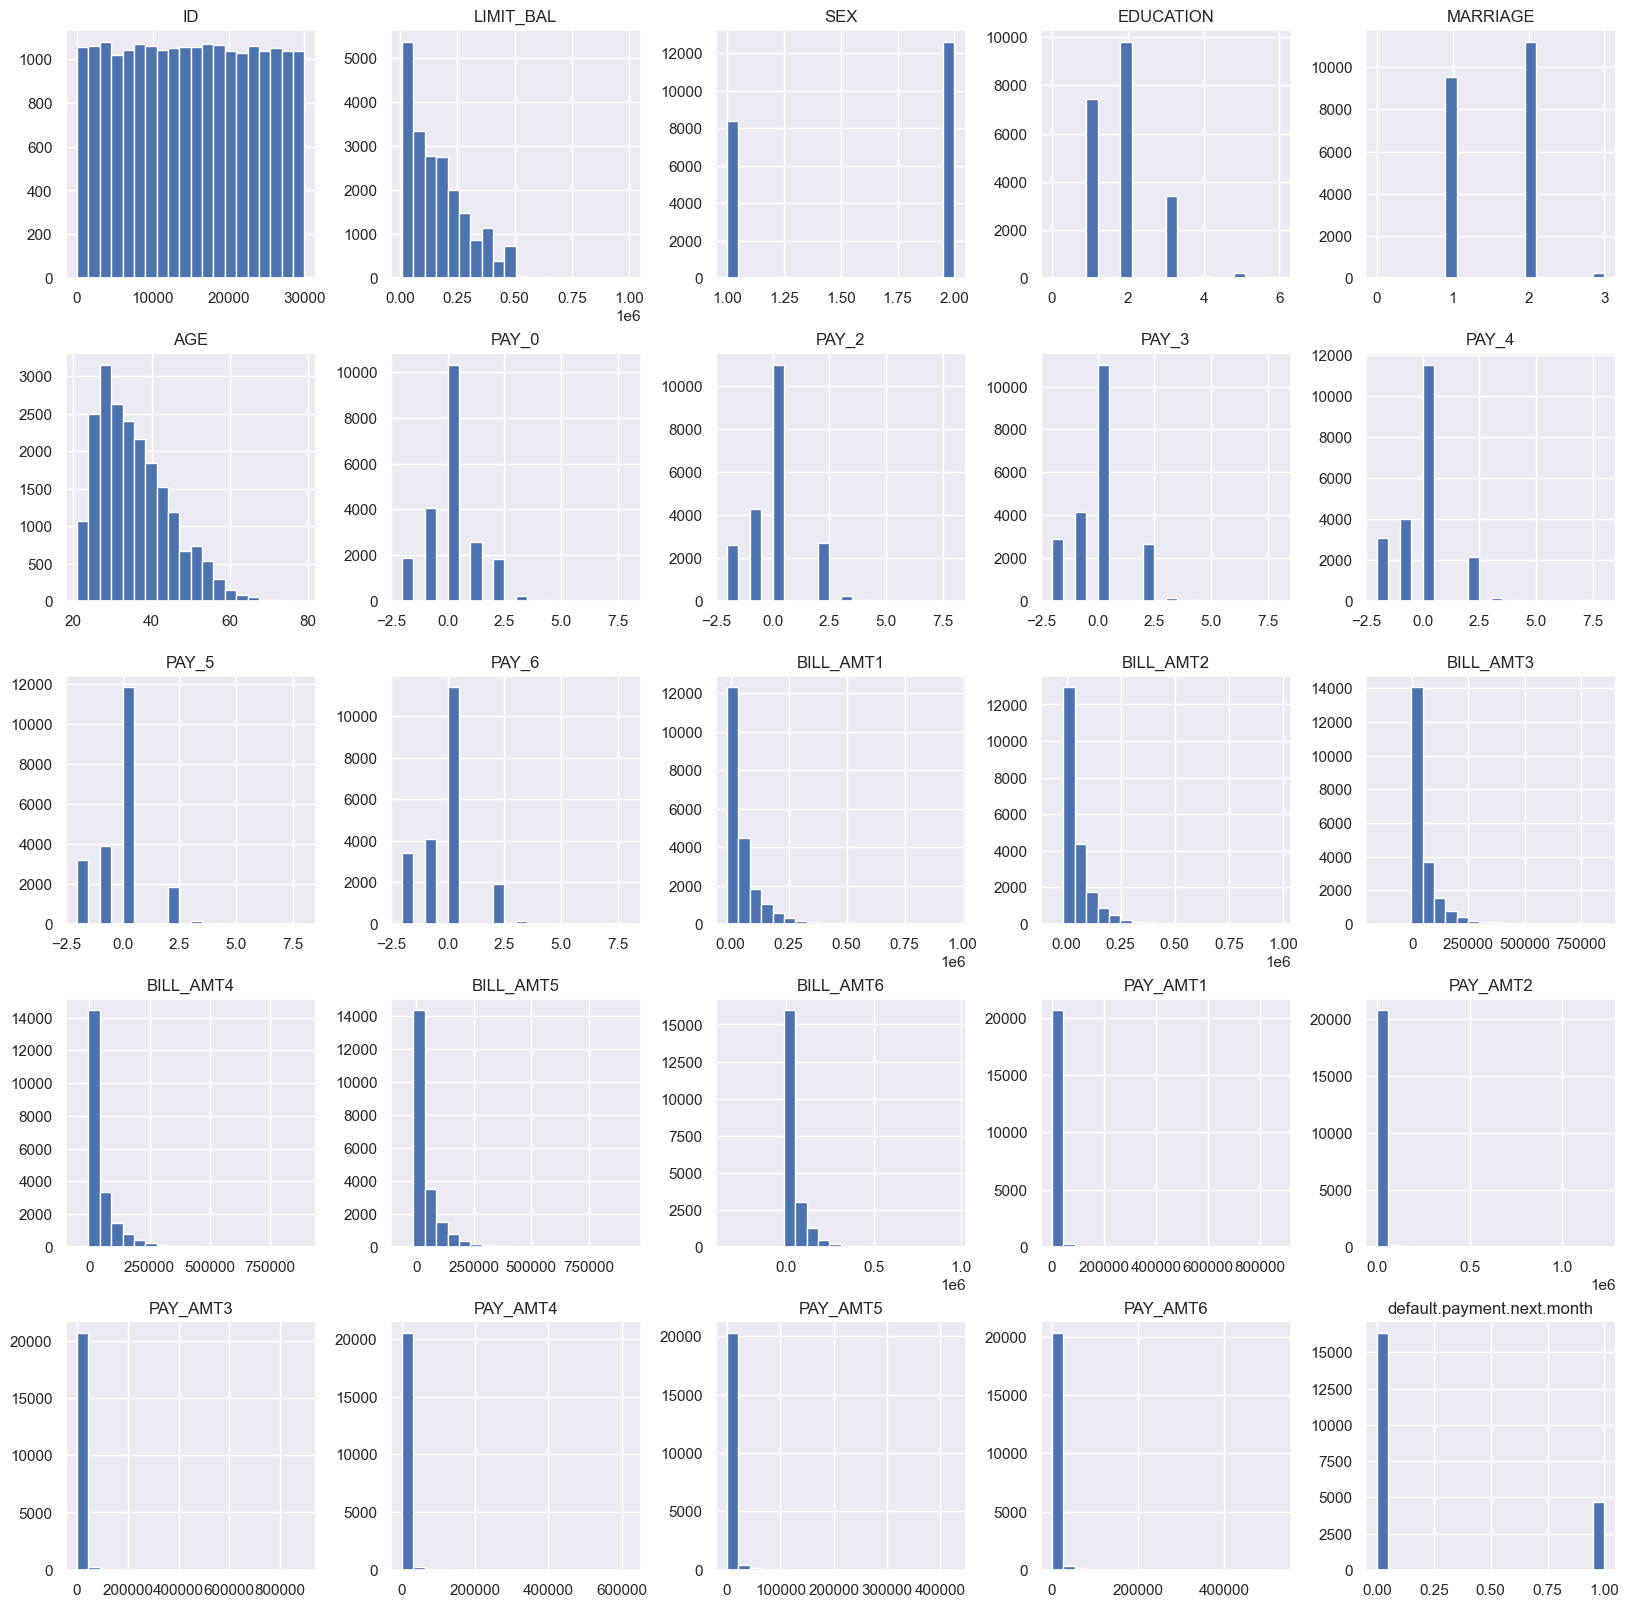

In [14]:
# BEGIN SOLUTION
train_df.hist(figsize=(20, 20), bins=20);
# END SOLUTION

We see quite a few outliers for features such as `EDUCATION`, `MARRIAGE`, and `PAY_\d*` features. 

Some initial observations:
    
- We have very few features.
- We have class imbalance and we need to deal with it. We have chosen macro average f1 as our metric where both classes get equal weight. 
- The feature ranges are very different, so we'll need to standardize. 
- We have a number of collinear features.
- We have quite a few outliers. 
- The data is messy / doesn't always correspond to the data description. 
  - What are education levels 5 and 6?
  - What does it mean for PAY_* to be -2? Or 0?

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

In [15]:
# BEGIN SOLUTION
# Let's identify numeric and categorical features
drop_features = ["ID"]
numeric_features = [
    "LIMIT_BAL",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "AGE",
]
binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
target = "default.payment.next.month"
# END SOLUTION

In [16]:
# BEGIN SOLUTION
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
)
# END SOLUTION

In [24]:
# BEGIN SOLUTION
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

results = {}
# END SOLUTION

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [19]:
# BEGIN SOLUTION
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
# END SOLUTION

In [25]:
# BEGIN SOLUTION
dummy = DummyClassifier(strategy="stratified")
results["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)
# END SOLUTION

,dummy
fit_time,0.002 (+/- 0.001)
score_time,0.002 (+/- 0.001)
test_score,0.499 (+/- 0.009)
train_score,0.501 (+/- 0.003)


<!-- END QUESTION -->



In [26]:
cross_val_score(dummy, X_train, y_train)

array([0.66404762, 0.65428571, 0.65071429, 0.66642857, 0.65380952])

<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Type your answer here, replacing this text._

In [27]:
# BEGIN SOLUTION
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logreg"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)
# END SOLUTION

,dummy,logreg
fit_time,0.002 (+/- 0.001),0.048 (+/- 0.013)
score_time,0.002 (+/- 0.001),0.004 (+/- 0.000)
test_score,0.499 (+/- 0.009),0.626 (+/- 0.004)
train_score,0.501 (+/- 0.003),0.629 (+/- 0.004)


In [28]:
# BEGIN SOLUTION
from scipy.stats import lognorm, loguniform, randint

param_grid = {"logisticregression__C": loguniform(1e-3, 1e3)}

random_search = RandomizedSearchCV(
    pipe_lr,
    param_grid,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search.fit(X_train, y_train);
# END SOLUTION

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [29]:
# BEGIN SOLUTION
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_logisticregression__C",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]
# END SOLUTION

Best hyperparameter values:  {'logisticregression__C': 0.011290431413903906}
Best score: 0.628


,mean_train_score,mean_test_score,param_logisticregression__C,mean_fit_time,std_test_score
rank_test_score,,,,,
1,0.631350,0.627773,0.01129,0.025785,0.004898
2,0.630839,0.627717,0.02342,0.030867,0.003793
3,0.630789,0.627717,0.022967,0.032028,0.003755
4,0.630798,0.627714,0.031822,0.033623,0.004058
5,0.631466,0.627493,0.012444,0.027650,0.004671
6,0.630699,0.627213,0.00494,0.021913,0.003823
7,0.630112,0.627188,0.057847,0.034664,0.004195
8,0.630299,0.627110,0.0521,0.036834,0.004563
9,0.629620,0.626954,0.114569,0.037689,0.004336


In [30]:
# BEGIN SOLUTION
best_logreg = random_search.best_estimator_
results["logreg (tuned)"] = mean_std_cross_val_scores(
    best_logreg, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

pd.DataFrame(results).T
# END SOLUTION

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.009),0.501 (+/- 0.003)
logreg,0.048 (+/- 0.013),0.004 (+/- 0.000),0.626 (+/- 0.004),0.629 (+/- 0.004)
logreg (tuned),0.028 (+/- 0.001),0.004 (+/- 0.000),0.628 (+/- 0.005),0.631 (+/- 0.004)


- Logistic regression scores are better than the dummy classifier scores. 
- Optimizing the regularization hyperparameter of logistic regression improved the validation scores slightly (from 0.625 to 0.629) but not by much. 
- In both cases it seems like we are underfitting; there is not much gap between train and validation scores. Probably non-linear models might be a better choice here. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Type your answer here, replacing this text._

In [31]:
# BEGIN SOLUTION
ratio = np.bincount(y_train)[0] / np.bincount(y_train)[1]
ratio
# END SOLUTION

3.507405022537025

In [32]:
# BEGIN SOLUTION
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "RBF SVM": SVC(),
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=2),
    "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=2),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, random_state=2),
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

pd.DataFrame(results).T
# END SOLUTION

[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[LightGBM] [Info] Start training from score -1.254945
[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[Lig

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.009),0.501 (+/- 0.003)
logreg,0.048 (+/- 0.013),0.004 (+/- 0.000),0.626 (+/- 0.004),0.629 (+/- 0.004)
logreg (tuned),0.028 (+/- 0.001),0.004 (+/- 0.000),0.628 (+/- 0.005),0.631 (+/- 0.004)
RBF SVM,3.908 (+/- 0.053),1.041 (+/- 0.013),0.674 (+/- 0.010),0.687 (+/- 0.002)
random forest,2.581 (+/- 0.046),0.047 (+/- 0.002),0.676 (+/- 0.007),0.999 (+/- 0.000)
xgboost,0.309 (+/- 0.036),0.007 (+/- 0.001),0.671 (+/- 0.003),0.868 (+/- 0.006)
lgbm,0.590 (+/- 0.060),0.009 (+/- 0.001),0.687 (+/- 0.007),0.771 (+/- 0.002)


- I am using four non-linear models here: RBF SVM and three tree-based models. 
- We are trying all models with default hyperparameters. 
- Similar to logistic regression, SVC also seems to underfit; the gap between train and test scores are not large. Also, as expected, it takes longer to `fit` compared to other models. Let's abandon it. 

- LGBM seems to be the best performing model among the tree-based models. It also seems to be much faster and overfitting less compared to random forest and xgboost. That said, it's std is higher than the other two models. 

In [33]:
# BEGIN SOLUTION
del models["RBF SVM"]
# END SOLUTION

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

#### Random forest hyperparameter optimization 

In [34]:
# BEGIN SOLUTION    
param_grid_rf = {
    "randomforestclassifier__n_estimators": randint(low=10, high=100),
    "randomforestclassifier__max_depth": randint(low=2, high=20),
}

pipe_random_forest = make_pipeline(preprocessor, models["random forest"])
# END SOLUTION    

In [35]:
# BEGIN SOLUTION    
random_search_rf = RandomizedSearchCV(
    pipe_random_forest,
    param_grid_rf,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_rf.fit(X_train, y_train)
# END SOLUTION

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_A...
                   param_distributions={'randomforestclassifier__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a8e5a440>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a8960280>},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro),
                   verbose=1)

In [36]:
# BEGIN SOLUTION  
print("Best hyperparameter values: ", random_search_rf.best_params_)
print("Best score: %0.3f" % (random_search_rf.best_score_))

pd.DataFrame(random_search_rf.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]
# END SOLUTION

Best hyperparameter values:  {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__n_estimators': 79}
Best score: 0.704


,mean_train_score,mean_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_depth,mean_fit_time,std_test_score
rank_test_score,,,,,,
1,0.815087,0.704255,79,12,1.440806,0.005550
2,0.814766,0.703836,67,12,1.219836,0.004165
3,0.839295,0.702335,68,13,1.370985,0.003980
4,0.792449,0.702104,62,11,1.089053,0.002099
5,0.768840,0.701068,35,10,0.565745,0.003646
6,0.812418,0.700567,32,12,0.590080,0.002526
7,0.790062,0.700397,42,11,0.718162,0.003425
8,0.835886,0.700091,31,13,0.600863,0.005196
9,0.836662,0.699502,37,13,0.714884,0.005326


In [37]:
# BEGIN SOLUTION  
best_rf_model = random_search_rf.best_estimator_
results["random forest (tuned)"] = mean_std_cross_val_scores(
    best_rf_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T
# END SOLUTION  

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.009),0.501 (+/- 0.003)
logreg,0.048 (+/- 0.013),0.004 (+/- 0.000),0.626 (+/- 0.004),0.629 (+/- 0.004)
logreg (tuned),0.028 (+/- 0.001),0.004 (+/- 0.000),0.628 (+/- 0.005),0.631 (+/- 0.004)
RBF SVM,3.908 (+/- 0.053),1.041 (+/- 0.013),0.674 (+/- 0.010),0.687 (+/- 0.002)
random forest,2.581 (+/- 0.046),0.047 (+/- 0.002),0.676 (+/- 0.007),0.999 (+/- 0.000)
xgboost,0.309 (+/- 0.036),0.007 (+/- 0.001),0.671 (+/- 0.003),0.868 (+/- 0.006)
lgbm,0.590 (+/- 0.060),0.009 (+/- 0.001),0.687 (+/- 0.007),0.771 (+/- 0.002)
random forest (tuned),1.437 (+/- 0.034),0.023 (+/- 0.001),0.704 (+/- 0.006),0.815 (+/- 0.003)


#### LGBM hyperparameter optimization 

In [38]:
# BEGIN SOLUTION  
param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    # "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

pipe_lgbm = make_pipeline(
    preprocessor,
    models["lgbm"],
)
# END SOLUTION  

In [39]:
# BEGIN SOLUTION  
random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_lgbm.fit(X_train, y_train)
# END SOLUTION  

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[LightGBM] [Info] Start training from score -1.254945
[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [bin

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',
                                                                                'PAY_A...
                   n_iter=50, n_jobs=1,
                   param_distributions={'lgbmclassifier__learning_rate': [0.01,
                                                                          0.1],
                                        'lgbmclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a8e5b250>,
                                        'lgbmclassifier__subsample': [0.5, 0.75,
                                                                      1]},
                   random_state=123, return_train_score=True,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro),
                   verbose=1)

In [40]:
# BEGIN SOLUTION  
print("Best hyperparameter values: ", random_search_lgbm.best_params_)
print("Best score: %0.3f" % (random_search_lgbm.best_score_))

pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_lgbmclassifier__n_estimators",
        "param_lgbmclassifier__learning_rate",
        "param_lgbmclassifier__subsample",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]
# END SOLUTION

Best hyperparameter values:  {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__n_estimators': 13, 'lgbmclassifier__subsample': 0.5}
Best score: 0.702


,mean_train_score,mean_test_score,param_lgbmclassifier__n_estimators,param_lgbmclassifier__learning_rate,param_lgbmclassifier__subsample,mean_fit_time
rank_test_score,,,,,,
1,0.716018,0.701993,13,0.1,0.5,0.106666
2,0.712341,0.701416,11,0.1,1,0.092195
2,0.712341,0.701416,11,0.1,0.5,0.095222
4,0.719044,0.700404,17,0.1,1,0.121093
5,0.704334,0.695475,94,0.01,0.5,0.538431
6,0.719437,0.694075,22,0.1,1,0.135646
7,0.719774,0.692165,24,0.1,1,0.163554
8,0.698725,0.691062,86,0.01,0.5,0.497919
9,0.693424,0.688776,80,0.01,0.75,0.467376


In [41]:
# BEGIN SOLUTION  
best_lgbm_model = random_search_lgbm.best_estimator_
results["lgbm (tuned)"] = mean_std_cross_val_scores(
    best_lgbm_model, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T
# END SOLUTION  

[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3274
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[LightGBM] [Info] Start training from score -1.254945
[LightGBM] [Info] Number of positive: 3727, number of negative: 13073
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3273
[LightGBM] [Info] Number of data points in the train set: 16800, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221845 -> initscore=-1.254945
[LightGBM] [Info] Start training from score -1.254945
[LightGBM] [In

,fit_time,score_time,test_score,train_score
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.009),0.501 (+/- 0.003)
logreg,0.048 (+/- 0.013),0.004 (+/- 0.000),0.626 (+/- 0.004),0.629 (+/- 0.004)
logreg (tuned),0.028 (+/- 0.001),0.004 (+/- 0.000),0.628 (+/- 0.005),0.631 (+/- 0.004)
RBF SVM,3.908 (+/- 0.053),1.041 (+/- 0.013),0.674 (+/- 0.010),0.687 (+/- 0.002)
random forest,2.581 (+/- 0.046),0.047 (+/- 0.002),0.676 (+/- 0.007),0.999 (+/- 0.000)
xgboost,0.309 (+/- 0.036),0.007 (+/- 0.001),0.671 (+/- 0.003),0.868 (+/- 0.006)
lgbm,0.590 (+/- 0.060),0.009 (+/- 0.001),0.687 (+/- 0.007),0.771 (+/- 0.002)
random forest (tuned),1.437 (+/- 0.034),0.023 (+/- 0.001),0.704 (+/- 0.006),0.815 (+/- 0.003)
lgbm (tuned),0.105 (+/- 0.009),0.007 (+/- 0.001),0.702 (+/- 0.004),0.716 (+/- 0.003)


**Summary of observations**

Hyperparameter optimization seems to help with random forests as well as LightGBM. The scores for both models seem very similar. But we pick LightGBM because
- it seems to be overfitting less
- it's much faster
- the standard deviation is smaller compared to random forest. 

<!-- END QUESTION -->

<br><br>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

In [40]:
# BEGIN SOLUTION  
import eli5

categorical_OHE = list(
    best_lgbm_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-2"]
    .get_feature_names(categorical_features)
)

feature_names = numeric_features + binary_features + categorical_OHE

eli5.show_weights(
    best_lgbm_model.named_steps["lgbmclassifier"],
    feature_names=feature_names,
)
# END SOLUTION  

/Users/lzung/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight,Feature
0.5927,PAY_0
0.0585,PAY_AMT2
0.0431,LIMIT_BAL
0.0417,BILL_AMT1
0.0278,PAY_4
0.0277,PAY_2
0.0275,PAY_3
0.0259,PAY_AMT3
0.0226,PAY_AMT4
0.0195,PAY_AMT1


In [43]:
# BEGIN SOLUTION  
import shap

preprocessor.fit(X_train, y_train)

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)

X_train_enc.head()
# END SOLUTION  

/Users/lzung/miniconda3/envs/cpsc330/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/lzung/miniconda3/envs/cpsc330/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_m

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
16395,1.168355,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,-0.300665,-0.293394,-0.265310,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21448,2.090017,-0.878738,-0.722412,-0.692571,0.192754,0.232531,0.257059,-0.685307,-0.679495,0.585444,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20034,-0.060527,-1.771246,-1.559598,-1.528626,-1.518801,-1.526210,-1.485154,-0.696132,-0.688319,-0.681234,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25755,-0.367748,0.013770,0.114774,0.143483,0.192754,0.232531,0.257059,0.687456,0.752583,0.835581,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1438,-0.905384,0.906278,1.789147,0.143483,0.192754,0.232531,0.257059,-0.040230,-0.031399,-0.287429,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [44]:
# BEGIN SOLUTION  
lgbm_tuned = LGBMClassifier(
    scale_pos_weight=ratio,
    random_state=2,
    learning_rate=random_search_lgbm.best_params_["lgbmclassifier__learning_rate"],
    n_estimators=random_search_lgbm.best_params_["lgbmclassifier__n_estimators"],
    subsample=random_search_lgbm.best_params_["lgbmclassifier__subsample"],
)

lgbm_tuned.fit(X_train_enc, y_train)
lgbm_explainer = shap.TreeExplainer(lgbm_tuned)
lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)
# END SOLUTION  

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [45]:
# BEGIN SOLUTION  
values = np.abs(lgbm_shap_values[0]).mean(0)
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]
# END SOLUTION  

,SHAP
PAY_0,0.379010
LIMIT_BAL,0.129931
PAY_AMT2,0.093941
BILL_AMT1,0.086548
PAY_AMT3,0.059370
PAY_2,0.051485
PAY_3,0.050122
PAY_AMT1,0.044178
PAY_AMT4,0.043867
PAY_4,0.039639


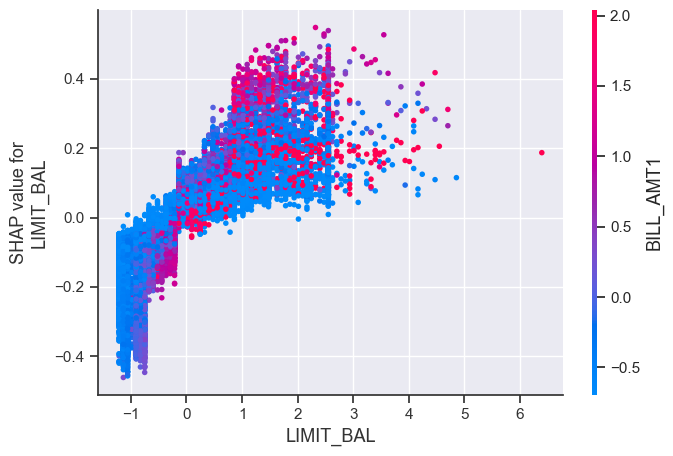

In [46]:
# BEGIN SOLUTION  
shap.dependence_plot("LIMIT_BAL", lgbm_shap_values[0], X_train_enc)
# END SOLUTION  

As `LIMIT_BAL` increases, SHAP values for class 0 increase as well, suggesting that class is likely to be 0 (non default) with higher values for LIMIT_BAL, which makes sense.    

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


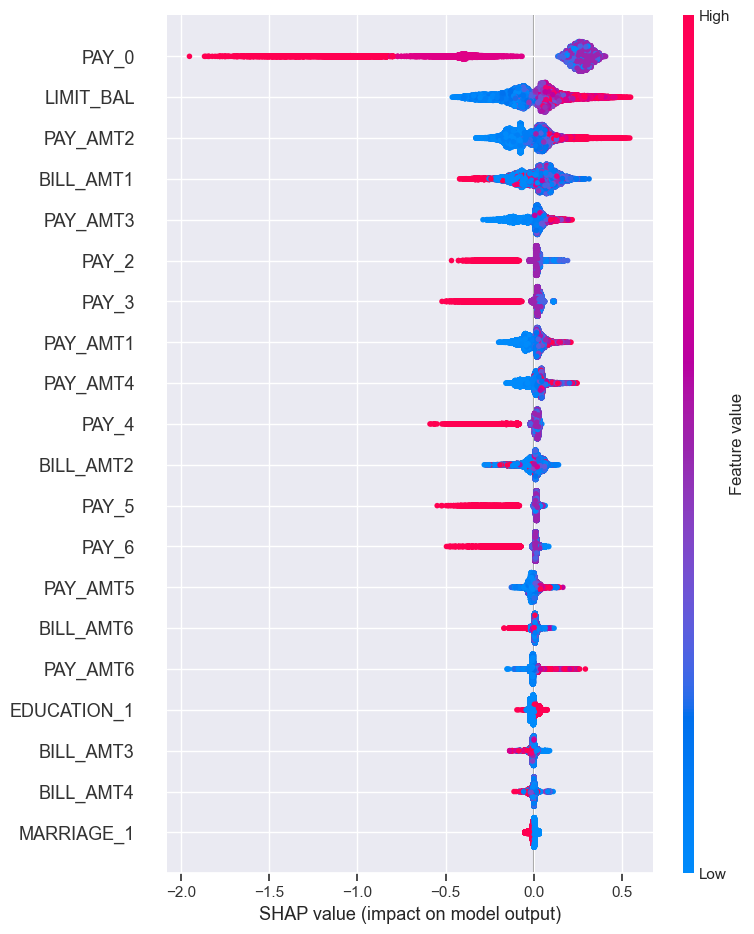

In [47]:
# BEGIN SOLUTION  
shap.summary_plot(lgbm_shap_values[0], X_train_enc)
# END SOLUTION  

In [48]:
# BEGIN SOLUTION  
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

test_lgbm_shap_values = lgbm_explainer.shap_values(X_test_enc)
# END SOLUTION  

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [49]:
# BEGIN SOLUTION  
lgbm_tuned.predict_proba(X_test_enc)[1]
# END SOLUTION  

array([0.74058038, 0.25941962])

In [50]:
# BEGIN SOLUTION  
lgbm_tuned.predict(X_test_enc, raw_score=True)[1]
# END SOLUTION  

-1.0489872894312522

In [51]:
# BEGIN SOLUTION  
lgbm_explainer.expected_value
# END SOLUTION  

[0.5594117098974121, -0.5594117098974121]

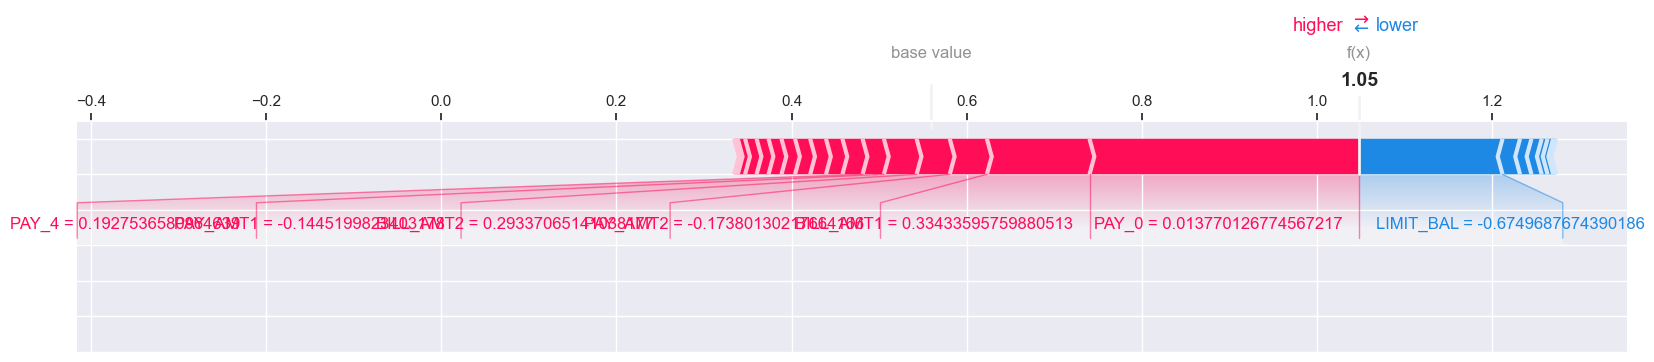

In [52]:
# BEGIN SOLUTION  
shap.force_plot(
    lgbm_explainer.expected_value[0],
    test_lgbm_shap_values[0][1, :],
    X_test_enc.iloc[1, :],
    matplotlib=True,
)
# END SOLUTION  

**Summary of observations**
- From the analysis above we observe that **PAY_\d{0,2,3,4}**, **PAY_AMT**, **LIM_BAL** features seem to be one of the most important features with `PAY_0` being the topmost feature. 
- The SHAP dependence plot demonstrates that the class is likely to be 0 (non default) for higher values for LIMIT_BAL, which makes sense.
- The features `EDUCATION` and `SEX` doesn't seem to influence the prediction much. This might be because of the noise in the `EDUCTION` column; there are a number of unknown values in this column.  

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Type your answer here, replacing this text._

In [42]:
# BEGIN SOLUTION  
from sklearn.metrics import f1_score

best_model = random_search_lgbm.best_estimator_
print(
    "Grid Search best model validation score: %0.3f" % (random_search_lgbm.best_score_)
)

predictions = best_model.predict(X_test)
print(
    "Macro-average f1 score on the test set: %0.3f"
    % (f1_score(y_test, predictions, average="macro"))
)
# END SOLUTION  

Grid Search best model validation score: 0.702
Macro-average f1 score on the test set: 0.702


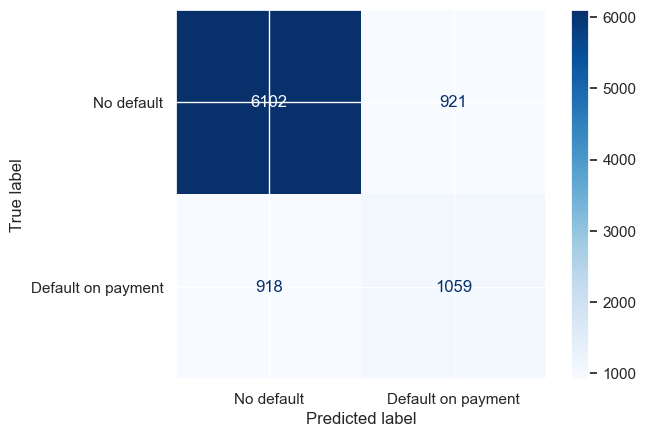

In [46]:
# BEGIN SOLUTION  
ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=["No default", "Default on payment"],
    values_format="d",
    cmap=plt.cm.Blues,
)
# END SOLUTION  

In [47]:
# BEGIN SOLUTION  
print(
    classification_report(
        y_test, predictions, target_names=["No default", "Default on payment"]
    )
)
# END SOLUTION  

                    precision    recall  f1-score   support

        No default       0.87      0.87      0.87      7023
Default on payment       0.53      0.54      0.54      1977

          accuracy                           0.80      9000
         macro avg       0.70      0.70      0.70      9000
      weighted avg       0.80      0.80      0.80      9000



The macro-average f1-score (0.695) on the held-out test set is pretty much in line with the macro-average f1-score validation score (0.707). So there doesn't seem to be severe optimization bias here.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

In [48]:
# BEGIN SOLUTION  
pd.DataFrame(results).T
summary_df = pd.DataFrame(results).T
# END SOLUTION  

In [51]:
# BEGIN SOLUTION  
comments = {
    "dummy": "Baseline of 0.50 macro-average f1 score.",
    "logreg": "Improvement over the baseline but underfitting.",
    "logreg (tuned)": "Slight improvement but still underfitting.",
    "RBF SVM": "Improvement over tuned logistic regression but slow.",
    "random forest": "Improvement over tuned logistic regression but overfitting.",
    "xgboost": "Best results so far and less overfitting compared to random forest.",
    "lgbm": "Improvement over xgboost and less overfitting.",
    "random forest (tuned)": "Hyperparameter optimization helped! Best results so far.",
    "lgbm (tuned)": "Hyperparameter optimization helped. Best results overall! The scores are very similar to random forest scores but picking this as the best model for its speed.",
}
pd.set_option("display.max_colwidth", 0)
summary_df["comments"] = comments.values()
summary_df
# END SOLUTION  

,fit_time,score_time,test_score,train_score,comments
dummy,0.002 (+/- 0.001),0.002 (+/- 0.001),0.499 (+/- 0.009),0.501 (+/- 0.003),Baseline of 0.50 macro-average f1 score.
logreg,0.048 (+/- 0.013),0.004 (+/- 0.000),0.626 (+/- 0.004),0.629 (+/- 0.004),Improvement over the baseline but underfitting.
logreg (tuned),0.028 (+/- 0.001),0.004 (+/- 0.000),0.628 (+/- 0.005),0.631 (+/- 0.004),Slight improvement but still underfitting.
RBF SVM,3.908 (+/- 0.053),1.041 (+/- 0.013),0.674 (+/- 0.010),0.687 (+/- 0.002),Improvement over tuned logistic regression but slow.
random forest,2.581 (+/- 0.046),0.047 (+/- 0.002),0.676 (+/- 0.007),0.999 (+/- 0.000),Improvement over tuned logistic regression but overfitting.
xgboost,0.309 (+/- 0.036),0.007 (+/- 0.001),0.671 (+/- 0.003),0.868 (+/- 0.006),Best results so far and less overfitting compared to random forest.
lgbm,0.590 (+/- 0.060),0.009 (+/- 0.001),0.687 (+/- 0.007),0.771 (+/- 0.002),Improvement over xgboost and less overfitting.
random forest (tuned),1.437 (+/- 0.034),0.023 (+/- 0.001),0.704 (+/- 0.006),0.815 (+/- 0.003),Hyperparameter optimization helped! Best results so far.
lgbm (tuned),0.105 (+/- 0.009),0.007 (+/- 0.001),0.702 (+/- 0.004),0.716 (+/- 0.003),Hyperparameter optimization helped. Best results overall! The scores are very similar to random forest scores but picking this as the best model for its speed.


#### Concluding remarks

All our models beat the baseline. Our best model was LightGBM classifier with tuned hyperparameters. It achieved cross-validation macro-average f1 score of 0.702. The scores do not seem to overfit much; the gap between mean train score (0.716) and mean cross-validation score (0.702) is not big. The tuned random forest is very slightly better with 0.704, but seems to overfit. Also, it's much slower than LightGBM. So we picked LightGBM model as our final model.  

We observed the macro-average f1 score of 0.7 using this model on the held out test set, which is in line with mean cross-validation macro-average f1-score (0.707). So there doesn't seem to be severe optimization bias here.

#### Other ideas
    
- Preprocessing and feature engineering     
    - The `BILL_AMT*` and `PAY_AMT*` variables are the bill amount, and amount paid, respectively. We could try making new features by subtracting or otherwise combining these, which would be the amount you paid relative to the amount owed.
    - There are a number of collinear features in the dataset, especially, our `PAY_\d{0,5}` features, which are one of the topmost important features. We could create new features by combining these features.     
    - More data cleaning would probably help. 
    - In my opinion, data cleaning and feature engineering are very important here.
    
- More careful hyperparameter optimization 
    - Because of limited time, we did not carry out extensive hyperparameter optimization. For instance, we didn't carry out hyperparameter optimization with the XGBoost model. It might be worth exploring this area a bit more.  

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using [PrairieLearn](https://ca.prairielearn.com/pl/course_instance/6697). Don't forget to rename your file `hw4_sol.ipynb`.

This was a tricky one but you did it!

![](img/eva-well-done.png)